# Lab 5 - Análisis de tráfico

Hugo Román 19199

Roberto Castillo 18

### Parte 1 - Análisis de paquetes

In [1]:
#imports
from scapy.all import *
import pandas as pd
import binascii
import matplotlib.pyplot as plt


In [2]:
#capturar 10 paquetes
capture = sniff(count=10)
capture

<Sniffed: TCP:5 UDP:5 ICMP:0 Other:0>

In [3]:
#Añada al pcap de 10 paquetes el archivo analisis_paquetes.pcap
pcapFile = rdpcap("analisis_paquetes.pcap")
pcap = capture + pcapFile
pcap

<Sniffed+analisis_paquetes.pcap: TCP:15 UDP:5 ICMP:0 Other:0>

In [4]:
#convierta el pcap a un dataframe
ip_fields = [field.name for field in IP().fields_desc]
tcp_fields = [field.name for field in TCP().fields_desc]
udp_fields = [field.name for field in UDP().fields_desc]

dataframe_fields = ip_fields + ['time'] + tcp_fields + ['payload','payload_raw','payload_hex']

df = pd.DataFrame(columns=dataframe_fields)
for packet in pcap[IP]:
    field_values = []
    for field in ip_fields:
        if field == 'options':
            field_values.append(len(packet[IP].fields[field]))
        else:
            field_values.append(packet[IP].fields[field])
    
    field_values.append(packet.time)
    
    layer_type = type(packet[IP].payload)
    for field in tcp_fields:
        try:
            if field == 'options':
                field_values.append(len(packet[layer_type].fields[field]))
            else:
                field_values.append(packet[layer_type].fields[field])
        except:
            field_values.append(None)
    
    field_values.append(len(packet[layer_type].payload))
    field_values.append(packet[layer_type].payload.original)
    field_values.append(binascii.hexlify(packet[layer_type].payload.original))
    df_append = pd.DataFrame([field_values], columns=dataframe_fields)
    df = pd.concat([df, df_append], axis=0)
    

df = df.reset_index()
df = df.drop(columns="index")
    


In [5]:

df.head()
df.tail()
df['src']
# Return Src Address, Dst Address, Src Port, Dst Port
df[['src','dst','sport','dport']]
##pcap_df = pd.DataFrame(result)
#pcap_df.set_axis(['Src Address', 'Dst Address', 'Src Port',' Dst Port'], axis='columns', inplace=True)
#pcap_df.head()

,src,dst,sport,dport
0,192.168.49.1,192.168.1.4,60000,62878
1,192.168.1.5,192.168.1.4,60000,62878
2,192.168.1.4,239.255.255.250,62878,1900
3,192.168.49.1,192.168.1.4,60000,62878
4,192.168.1.5,192.168.1.4,60000,62878
5,192.168.1.4,142.250.217.238,27593,443
6,142.250.217.238,192.168.1.4,443,27593
7,192.168.1.4,13.249.98.107,27300,443
8,192.168.1.4,13.249.98.107,27300,443
9,192.168.1.4,142.250.217.228,23344,443


In [6]:
#Estadisticas
#Muestre cual es la IP origen más frecuente
print(df['src'].describe(),'\n\n')


count              20
unique              8
top       192.168.1.4
freq               11
Name: src, dtype: object 




In [7]:
#Muestre cual es la IP destino más frecuente
print(df['dst'].describe(),"\n\n")

count              20
unique             11
top       192.168.1.4
freq                9
Name: dst, dtype: object 




In [8]:
#¿A qué IPs se comunica la IP del inciso a?
frequent_address = df['src'].describe()['top']
print(df[df['src'] == frequent_address]['dst'].unique(),"\n\n")

['239.255.255.250' '142.250.217.238' '13.249.98.107' '142.250.217.228'
 '172.217.2.195' '34.95.113.183' '142.250.189.130' '140.82.114.26'
 '192.178.50.38' '99.84.208.57'] 




In [9]:
#¿A qué puertos destino se comunica la IP del inciso a?
print(df[df['src'] == frequent_address]['dport'].unique(),"\n\n")

[1900 443] 




In [10]:
#¿A qué puertos origen se comunica la IP del inciso b?
print(df[df['dst'] == frequent_address]['sport'].unique(),"\n\n")

[60000 443] 




Los puertos del inciso d y e hacen referencia al protocolo de transferencia de hipertexto seguro que permite la transmisión segura de datos por toda la red (443) y el (53) Es usado por el servicio de DNS que permite utilizar tanto TCP como UDP para la comunicación con los servidores DNS.

#### Gráficas

<AxesSubplot: ylabel='src'>

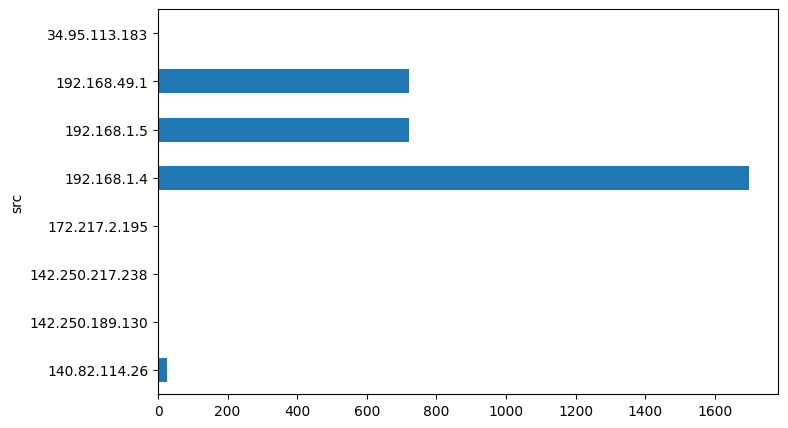

In [11]:
#Muestre una gráfica 2D, en el eje Y las IPs origen, y en el eje X la suma de los payloads
#enviados de dichas direcciones

payloads = df.groupby("src")['payload'].sum()
payloads.plot(kind='barh',title="",figsize=(8,5))

<AxesSubplot: ylabel='dst'>

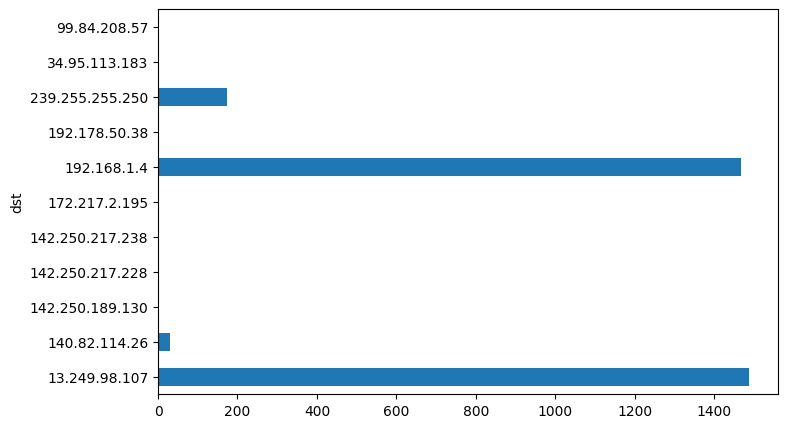

In [12]:
#Muestre una gráfica 2D, en el eje Y las IPs destino, y en el eje X la suma de los payloads
#recibidos en dichas direcciones.

payloads = df.groupby("dst")['payload'].sum()
payloads.plot(kind='barh',title="",figsize=(8,5))

<AxesSubplot: ylabel='sport'>

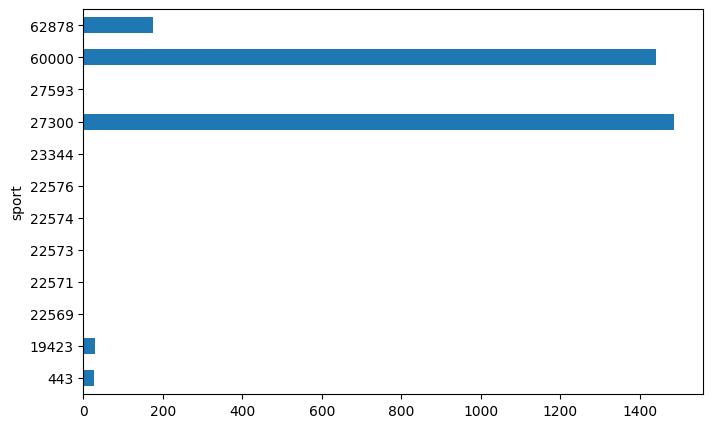

In [13]:
#Muestre una gráfica 2D, en el eje Y los puertos origen, y en el eje X la suma de los
#payloads enviados de dichos puertos.

payloads = df.groupby("sport")['payload'].sum()
payloads.plot(kind='barh',title="",figsize=(8,5))

<AxesSubplot: ylabel='dport'>

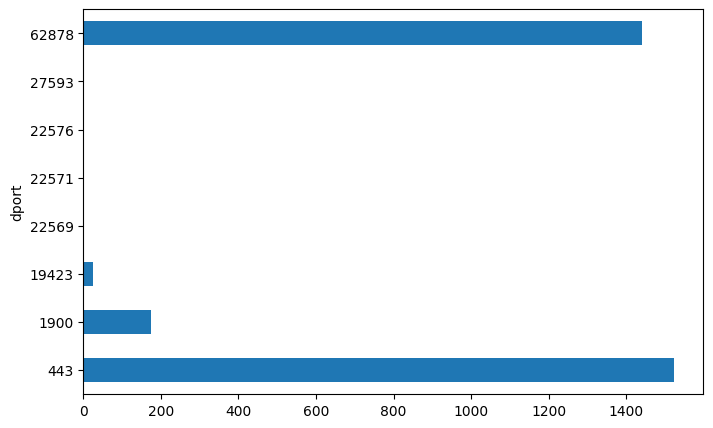

In [14]:
#Muestre una gráfica 2D, en el eje Y los puertos destino, y en el eje X la suma de los
#payloads recibidos en dichos puertos
payloads = df.groupby("dport")['payload'].sum()
payloads.plot(kind='barh',title="",figsize=(8,5))

### Payload

In [15]:
#Cree un nuevo DF que incluya únicamente las conexiones con la dirección IP origen
#más frecuente

frequent_address_df = df[df['src']==frequent_address]

In [16]:
#Obtenga un nuevo DF con las columnas Src Address, Dst Address y agrúpelas por payload
frequent_address_groupby = frequent_address_df[['src','dst','payload']].groupby("dst")['payload'].sum()

In [17]:
#Obtenga la IP que más ha intercambiado bytes con la IP más frecuente. Esta IP es sospechosa por la cantidad de bytes intercambiados, entre todas las direcciones. 
suspicious_ip = frequent_address_groupby.sort_values(ascending=False).index[0]
print(suspicious_ip)


13.249.98.107


In [18]:
#Cree un nuevo DF con la conversación entre la IP más frecuente y la IP sospechosa.
suspicious_df = frequent_address_df[frequent_address_df['dst']==suspicious_ip]
#Obtenga los payloads del DF del inciso 6, y añada cada uno en un array.
#Muestre el contenido del array
raw_stream = []
for p in suspicious_df['payload_raw']:
    raw_stream.append(p)
    
print(raw_stream)


[b'\x17\x03\x03\x00N\xc0\x96\xde\xe8 \xa4-(j\xef\x9f\xc5\xcc\x9dN\x04\x9c\xc9\xda\t\xf8\xdeA\x13zb\x8b\xee\x04]\xc5\x916I0"!\xfd\x02\x93\xd9\xed\x9a\x1b\xcc\xbcm\xf2\xa9\x97\xee\x93Eg\xff/f\t\x17i\xdea\x96q,\x88*\xd8\xce\xd2\xc2\n{\x83\x94\xc4M\t', b'\x17\x03\x03\x05v\xed*`\xc7z\xaa\xe6#r\xd2\xa5\x0b\xcfjQ[\x86\xb7\x1c\xcfNET\xbe\xa1_\x1cR\xa2;\x17\xda\x00j\x95nn\xad\xe0O\x1e\x96\x1bPE\x7fk1\x84\xc3\r~\xc0k%Q\x9c\xcf\xc3X\xbfkT\x9b|\xcd\xe5\x0c\xe5\xf8\xf1_\x87\xb1\xe0\xc7Fv\x9a\x06\x0eYH\x98\x89P\x82\x81\xa7dUG\xbd\x16-\x04\xfd\'63\xf4\'\xe0]+\xf7\xe6\xb3Q;-\xd4\xd3D\xde\xc1W6u\x0b&\xd7\x1d\xaam\xac@\xe2\xa0L\xaa\x03\x02\xb7\x83C\xea\xc3yV\x7fd\x99\x91\xb9v\xd5\x14\xd3\x99\x89\xb19\x97XM\xb4s\x96\x86\x10\x80S\xfa\xec9\xbd\x04\x14\xfe\xb42\x1fw\xd4L\x8d9\xb1\xd0\xf3\x95`\xc5\x9f\xdeA\xf3m\x17\xa7\x0fW8\xcf\x0e\x06u@\x03\xdf\x16\xa8_\xaf\r\x82/J\xf46=\x15w\xcdc\x06\xde`\xc8\x1eO\t\x0bl\xd9\x8a\xf5\x7fl\xab\xce\x1d\x8e\xbc!\xdd\x91\xf7(\x97\x91\xdf,4\x16\xf7\xc6\x1d\xc7(\xf7\xc0^\x04=&\x

## Parte 2

In [19]:
df2 = pd.read_csv('Train_data.csv')


#### Análisis exploratorio

In [20]:
df2.sample(n=10).head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
14693,0,tcp,auth,REJ,0,0,0,0,0,0,...,12,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
581,0,tcp,ftp,SF,1250,2451,0,0,0,28,...,65,0.27,0.02,0.00,0.00,0.00,0.00,0.01,0.00,anomaly
1054,0,tcp,uucp_path,S0,0,0,0,0,0,0,...,3,0.01,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
22113,0,tcp,http,SF,322,1246,0,0,0,0,...,255,1.00,0.00,0.20,0.05,0.00,0.00,0.00,0.00,normal
15280,0,tcp,bgp,S0,0,0,0,0,0,0,...,12,0.05,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
2035,0,tcp,http,SF,322,93111,0,0,0,0,...,255,1.00,0.00,0.03,0.03,0.03,0.01,0.00,0.00,normal
12515,0,tcp,domain,S0,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
22890,0,udp,domain_u,SF,44,133,0,0,0,0,...,254,1.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal
24657,0,tcp,http,SF,235,6225,0,0,0,0,...,255,1.00,0.00,0.02,0.11,0.00,0.00,0.79,0.68,normal
4646,0,tcp,private,S0,0,0,0,0,0,0,...,14,0.05,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e2a3834e-28ca-4100-8e52-8e13dfd4a895' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>